In [12]:
import praw
import pandas as pd
import os
from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from dotenv import load_dotenv
import nltk
import time
from utils.cleaner import clean_text
import matplotlib.pyplot as plt




## Api Authentication

In [2]:
# Reddit API Credentials 

load_dotenv()


reddit = praw.Reddit(
    client_id=os.getenv('REDDIT_CLIENT_ID'),
    client_secret=os.getenv('REDDIT_CLIENT_SECRET'),
    user_agent=os.getenv('REDDIT_USER_AGENT')
)


In [3]:
KEYWORDS = [
    # General Mental Health
    "mental health", "mental illness", "mental breakdown", "mental crisis",
    "emotional pain", "emotional distress", "emotional support",

    # Depression
    "depressed", "depression", "feeling down", "feeling empty",
    "hopeless", "helpless", "worthless", "no hope", "no future",
    "can't go on", "can't cope", "can't take it anymore",

    # Anxiety
    "anxiety", "anxious", "panic attack", "panic disorder",
    "feeling overwhelmed", "constant worry", "nervous breakdown",
    "social anxiety", "generalized anxiety", "feeling on edge",

    # Suicide and Self-Harm
    "suicide", "suicidal", "ending it all", "ending my life",
    "want to die", "don't want to live", "no way out",
    "self-harm", "self injury", "cutting", "burning", "self-destructive",

    # Loneliness and Isolation
    "lonely", "loneliness", "feeling alone", "isolated",
    "no one cares", "no one understands", "no support system",

    # Trauma and PTSD
    "trauma", "PTSD", "post-traumatic stress", "flashbacks",
    "nightmares", "emotional abuse", "physical abuse", "sexual abuse",
    "childhood trauma", "triggered", "feeling unsafe",

    # Addiction and Substance Use
    "addiction", "substance abuse", "alcoholism", "drug abuse",
    "overdose", "relapse", "withdrawal", "sobriety", "recovery",

    # Stress and Overwhelm
    "stressed", "stress", "burnout", "feeling overwhelmed",
    "can't handle it", "too much pressure", "breaking point",

    # Grief and Loss
    "grief", "mourning", "lost a loved one", "feeling lost",
    "heartbroken", "can't move on", "stuck in the past",

    # Self-Esteem and Worthlessness
    "low self-esteem", "feeling worthless", "self-hatred",
    "self-loathing", "no self-worth", "feeling like a failure",

    # Sleep Issues
    "insomnia", "can't sleep", "sleep problems", "nightmares",
    "exhausted", "chronic fatigue", "always tired",

    # Eating Disorders
    "eating disorder", "anorexia", "bulimia", "binge eating",
    "body image", "feeling fat", "starving myself",

    # Relationship Struggles
    "toxic relationship", "abusive relationship", "divorce",
    "breakup", "heartbreak", "cheating", "betrayal",

    # Work and Academic Stress
    "work stress", "job burnout", "academic pressure",
    "failing grades", "can't focus", "procrastination",

    # General Despair
    "feeling lost", "no purpose", "no direction", "no motivation",
    "can't find happiness", "life is meaningless", "life is pointless",

    # Physical Symptoms
    "headaches", "stomachaches", "chronic pain", "fatigue",
    "body aches", "feeling sick", "physical symptoms",

    # Seeking Help
    "need help", "seeking therapy", "mental health support",
    "crisis hotline", "suicide hotline", "therapy session",
    "counseling", "psychiatrist", "psychologist",

    # Miscellaneous
    "feeling numb", "emotional numbness", "feeling disconnected",
    "feeling trapped", "feeling stuck", "feeling hopeless",
    "feeling helpless", "feeling worthless", "feeling like a burden",
]

# KEYWORDS = [
#     "depressed", "anxitey", "mental health", "sad", "lonely", 
#     "trauma", "hopless", "panic attack", "crying", "no way out", 
#     "suicide", "addiction", "substance use", "struggling",  
#     "worthless", "ending it", "self-harm", 
# ]

In [4]:
# Extract posts from r/mentalhealth subreddit
subreddits = ["mentalhealth", "depression", "anxiety", "SuicideWatch"]


In [5]:
# Function to fetch posts
def fetch_posts():
    data = []
    for subreddit_name in subreddits:
        subreddit = reddit.subreddit(subreddit_name)
        
        for post in subreddit.hot(limit=200):  # Increase data fetch limit
            if any(keyword in post.title.lower() or keyword in post.selftext.lower() for keyword in KEYWORDS):
                data.append({
                    "Subreddit": subreddit_name,
                    "Post ID": post.id,
                    "Timestamp": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                    "Content": post.selftext,
                    "likes": post.score,
                    "Comments": post.num_comments,

                })
    
    return data

In [ ]:
# Infinite data collection with limit
total_data = []
while len(total_data) < 15000:  # Stop when 15,000 posts are collected
    new_data = fetch_posts()
    
    if new_data:
        total_data.extend(new_data)
        df = pd.DataFrame(new_data)
        df.to_csv("data/raw_data.csv", mode='a')  # Append to CSV
            
    if len(total_data) >= 15000:
        break  # Exit the loop

    time.sleep(60)  # Sleep for 1 minute before fetching again

Fetched new posts. Total collected: 15707


In [13]:
df = pd.read_csv("data/raw_data.csv")
df

,Subreddit,Post ID,Timestamp,Content,likes,Comments
0,mentalhealth,1gd9l9c,2024-10-27 12:13:33,Hello friends!\n\nIt's that time of the year a...,19,11
1,mentalhealth,1e297nd,2024-07-13 12:25:58,Hey r/mentalhealth! We're looking to grow our ...,22,27
2,mentalhealth,1jde2d0,2025-03-17 14:33:42,My bf(20M) and i(17F) have known eachother for...,85,85
3,mentalhealth,1jd37mh,2025-03-17 03:09:36,The number of posts by people claiming to get ...,138,88
4,mentalhealth,1jd4smm,2025-03-17 04:43:27,"My brother attempted to hang himself tonight, ...",65,17
...,...,...,...,...,...,...
15702,SuicideWatch,1jd3j9x,2025-03-17 03:27:36,I don't think I've ever felt so close to endin...,2,1
15703,SuicideWatch,1jd6tn4,2025-03-17 07:06:40,*I want to commit suicide but I don't like the...,1,0
15704,SuicideWatch,1jcyq4m,2025-03-16 23:21:33,"Growing up, people bullied me a lot. Some of i...",4,2
15705,SuicideWatch,1jd0lig,2025-03-17 00:51:59,\nIt’s not like I’m suicidal for attention or ...,3,0


In [14]:
df = df.copy()
df = df[~df["Content"].apply(lambda x: isinstance(x, float))]

df = df.reset_index(drop = True)

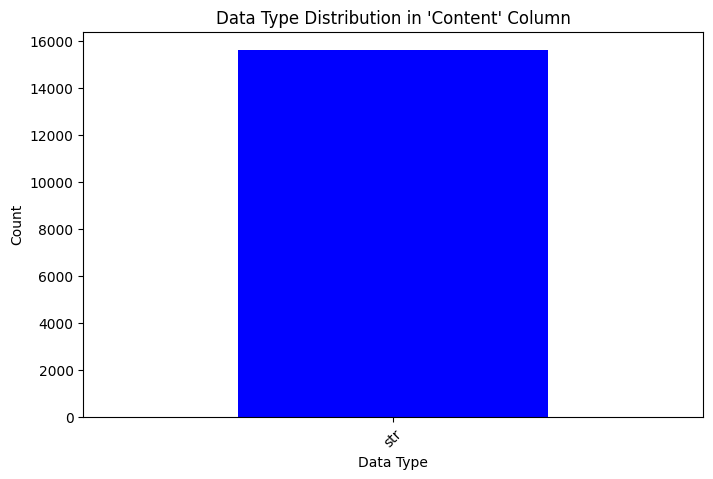

In [15]:
# Convert each entry to its data type
df["Content Type"] = df["Content"].apply(lambda x: type(x).__name__)

# Count occurrences of each data type
type_counts = df["Content Type"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
type_counts.plot(kind="bar", color=["blue", "green", "red"])
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.title("Data Type Distribution in 'Content' Column")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df["Cleaned Content"] = df["Content"].apply(clean_text)

In [ ]:
df["Cleaned Content"].head()

0    hello friend time year always intend rmentalhe...
1    hey rmentalhealth look grow moderation team mo...
2    bfm know eachother year together month long ag...
3    number post people claim get therapy chatgpt g...
4    brother attempt hang tonight call fail thing h...
Name: Cleaned Content, dtype: object

In [ ]:
df.to_csv("data/cleaned_data.csv", index=False)